## Color Compression 

### Color Compression with KMeans CLustering 

In [2]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_sample_image

In [5]:
china = load_sample_image('flower.jpg')

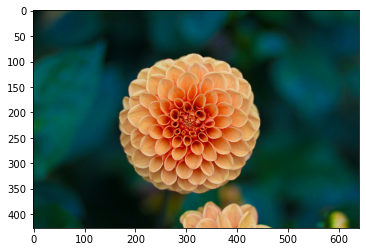

In [6]:
plt.figure()
plt.imshow(china)
plt.show()

In [7]:
china.shape

(427, 640, 3)

In [8]:
data=china/255.0
data=data.reshape(427 *640,3)
data.shape

(273280, 3)

In [11]:
from sklearn.cluster import KMeans

In [12]:
means2 = KMeans(n_clusters=8)
means2.fit(data)

KMeans()

In [13]:
means2.cluster_centers_ # the pixels at the mid point 

array([[0.76150075, 0.4306751 , 0.19687724],
       [0.01600405, 0.21170815, 0.19336207],
       [0.88996895, 0.71566681, 0.5056115 ],
       [0.00316896, 0.30840256, 0.32332963],
       [0.71363324, 0.15176705, 0.02385649],
       [0.85648097, 0.58851677, 0.34677018],
       [0.02477909, 0.11302384, 0.07982928],
       [0.27138696, 0.26787759, 0.12721595]])

In [14]:
means2.predict(data)

array([6, 6, 6, ..., 6, 6, 6])

In [15]:
means2.labels_ # all of the pixels but indicated by their group numbers  

array([6, 6, 6, ..., 6, 6, 6])

In [16]:
means2.labels_ == means2.predict(data)

array([ True,  True,  True, ...,  True,  True,  True])

In [17]:
means2.cluster_centers_[means2.labels_] 

array([[0.02477909, 0.11302384, 0.07982928],
       [0.02477909, 0.11302384, 0.07982928],
       [0.02477909, 0.11302384, 0.07982928],
       ...,
       [0.02477909, 0.11302384, 0.07982928],
       [0.02477909, 0.11302384, 0.07982928],
       [0.02477909, 0.11302384, 0.07982928]])

In [18]:
china2 = means2.cluster_centers_[means2.labels_].reshape(china.shape)

In [19]:
means2.cluster_centers_.shape

(8, 3)

In [20]:
means2.cluster_centers_[means2.labels_].shape #multiplication magic

(273280, 3)

In [22]:
import numpy as np

In [23]:
means2.cluster_centers_[np.array([0,0,0,0])]  #compare this aand the next cell, you see there is a multiplication

array([[0.76150075, 0.4306751 , 0.19687724],
       [0.76150075, 0.4306751 , 0.19687724],
       [0.76150075, 0.4306751 , 0.19687724],
       [0.76150075, 0.4306751 , 0.19687724]])

In [24]:
means2.cluster_centers_

array([[0.76150075, 0.4306751 , 0.19687724],
       [0.01600405, 0.21170815, 0.19336207],
       [0.88996895, 0.71566681, 0.5056115 ],
       [0.00316896, 0.30840256, 0.32332963],
       [0.71363324, 0.15176705, 0.02385649],
       [0.85648097, 0.58851677, 0.34677018],
       [0.02477909, 0.11302384, 0.07982928],
       [0.27138696, 0.26787759, 0.12721595]])

In [25]:
x = []
for i in means2.labels_:
    if i not in x:
        x.append(i)
        print(i)


6
1
7
3
0
5
2
4


In [26]:
len(means2.labels_)

273280

In [27]:
x

[6, 1, 7, 3, 0, 5, 2, 4]

## what i think is going on:
* the original image had 16 million pix
* we clustered it into 8 clusters i.e 8 groups and each piexl had their own groups
* each pixel was labelled from 0 to 7(8 clusters/ groups)
* the centre of each group was notted(group leaders
* then we replaced all the pixels with their corresponding group leader , i.e the pixel at the centre point

In [28]:
# reshape the new data and plot it 

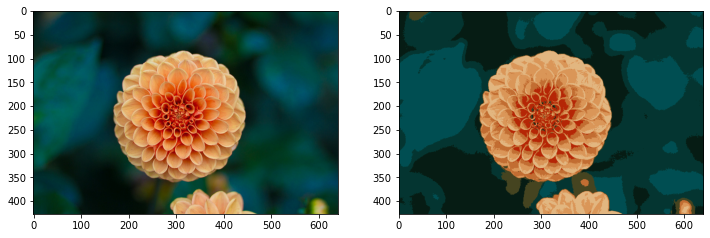

In [29]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(china)
ax[1].imshow(china2)